# Unsupervised Learning: Clustering Stocks based on financial attributes for personalized portfolios and investment strategies



### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

A financial consultancy firm provides their customers with personalized investment strategies. Financial data comprising of stock prices and other financial indicators for a no of companies listed under the New York Stock Exchange have been provided. The broad object is to perform data analysis, group stocks based on the various financial attributes, and share insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


## Mount Google Drive

In [2]:
# For mounting Google Drive to the notebook 
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Dataset

In [3]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Data Science/Unsupervised Learning/TradeAhead/stock_data.csv")

In [4]:
# Create a copy the dataframe
df=data.copy()

## Data Overview



### Checking the shape of the dataset

In [5]:
df.shape

(340, 15)

The dataset has **340 rows** and **15 columns**

### Display first few rows of dataset

In [6]:
# viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking data types for the dataset

In [7]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 4 datatypes of type object, rest are numeric (4 of type int and 7 are float)

- There are no missing values

### Check for missing values

In [8]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values in the dataset

### Check for duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

### Statistical summary of the dataset

In [10]:
# Let's look at the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Observations:

- There are 340 unique securities listed in the dataset

- These securities are subdivided into 11 GICS Sectors and 104 Sub Industries

- Industrials is the largest GICS sector with 53 securites listed under it

- Oil and Gas Exploration and Production is the largest sub industry with 16 entries in the dataset

- Median current price of securites is around 60 dollars. Price appears to be right skewed with a higher mean current price

- Price change in stocks span from -47% to 55% with a median price change of around 5%

- Volatility in securities span from 0.73 to 4.58 with a median volatility of 1.38 similar to the mean

- ROE spans from 1 to 917 with a median value of 15

- Net cash flow ranges from negative 11 billion to 20 billion dollars with a median net cash flow of around 2.1 billion dollars

- Net Income in securities range from negative 23 billion to 24 billion dollars with a median income of 0.7 billion

- Median cash ratio is about 50 with its range spanning from 0 to 958

- Earnings per share (EPS) ranges from -61 to 50

- Estimated shares in the securites span from 27 million to 6 billion shares with a median estimated shares outstanding around 309 million shares

- Securites have a P/E ratio ranging from 3 to 528 while a P/B ratio ranging from -76 to 129

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Pre-defined functions for EDA and data visualization

In [11]:
# Function to create histogram and boxplot 

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analyses

### **Numerical Variables**

#### **Current Price**

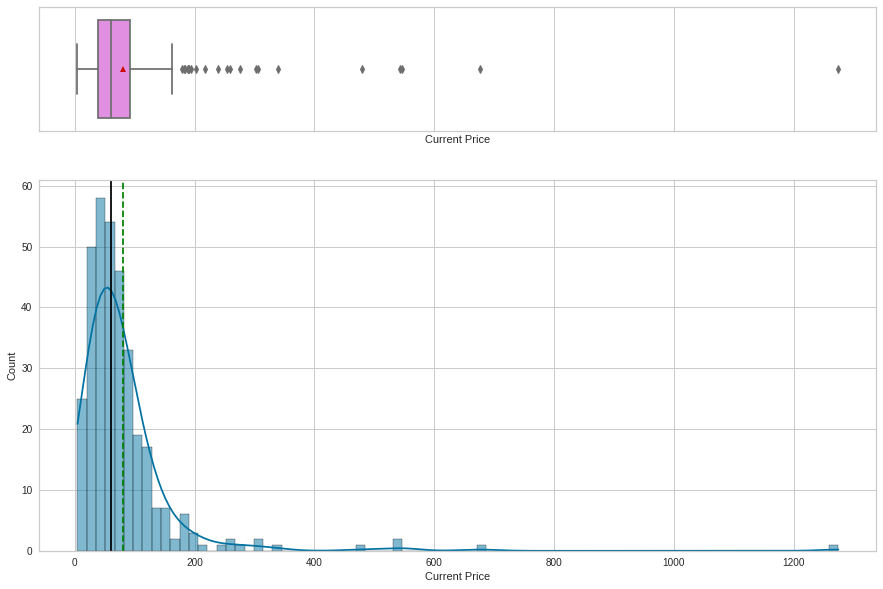

In [13]:
histogram_boxplot(df, "Current Price",kde=True)

##### **Q1. What does the distribution of stock prices look like?**

- Current stock price distribution is right skewed with the mean price slightly higher than the median price

- There are a number of outliers on the right spanning from 200 upto ~1300

#### **Price Change**

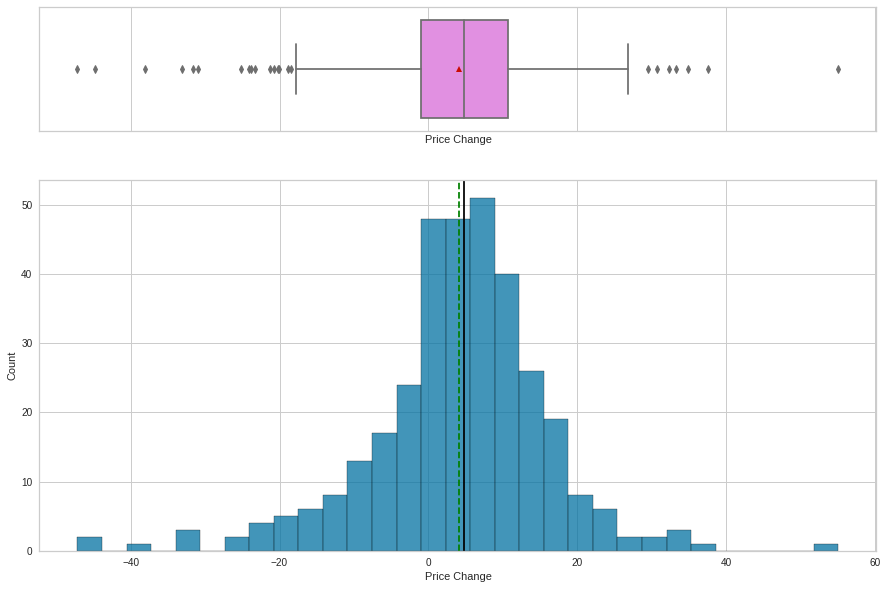

In [14]:
histogram_boxplot(df, "Price Change")

- Stock price change appears to be an approximately normal distribution with similar mean and median values around 4.5%

- There are a number of outliers both on left and right tail of the distribution

#### **Volatility**

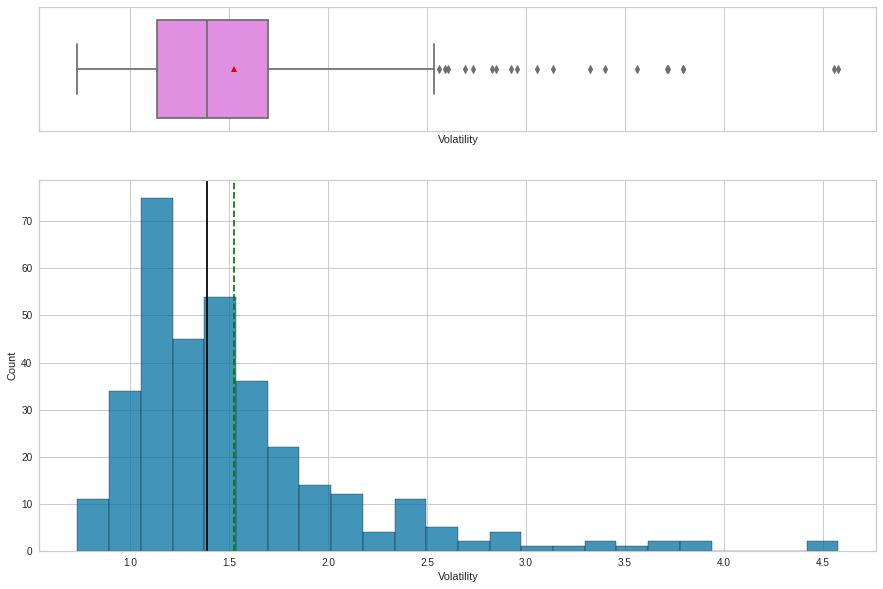

In [15]:
histogram_boxplot(df, "Volatility")

- Volatility also appears to be right skewed with a number of outliers on the right

#### **ROE**

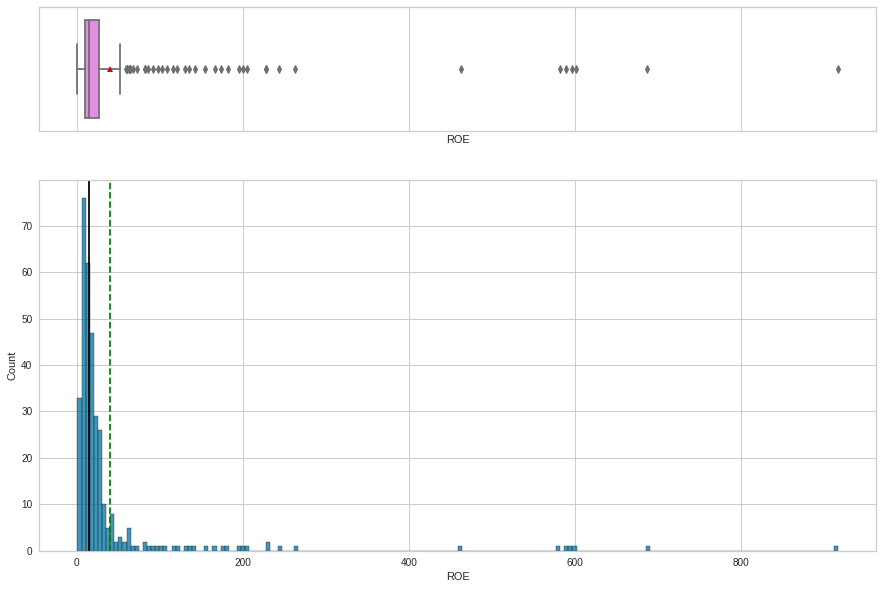

In [16]:
histogram_boxplot(df, "ROE")

- ROE also appears to be right skewed with a number of extreme outliers on the right

#### **Cash Ratio**

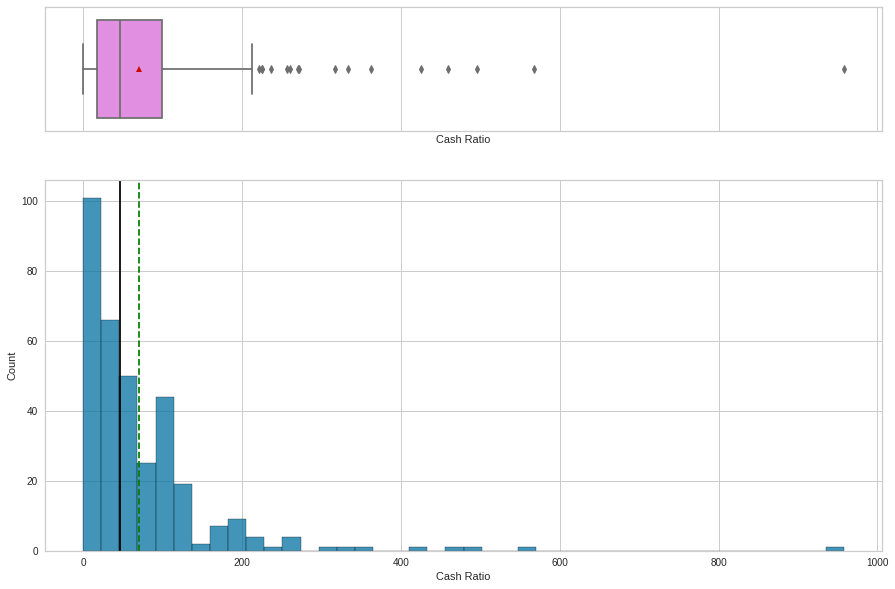

In [17]:
histogram_boxplot(df, "Cash Ratio")

- Cash ratio is a right skewed distribution
- There are outliers on the right tail

#### **Net Cash Flow**

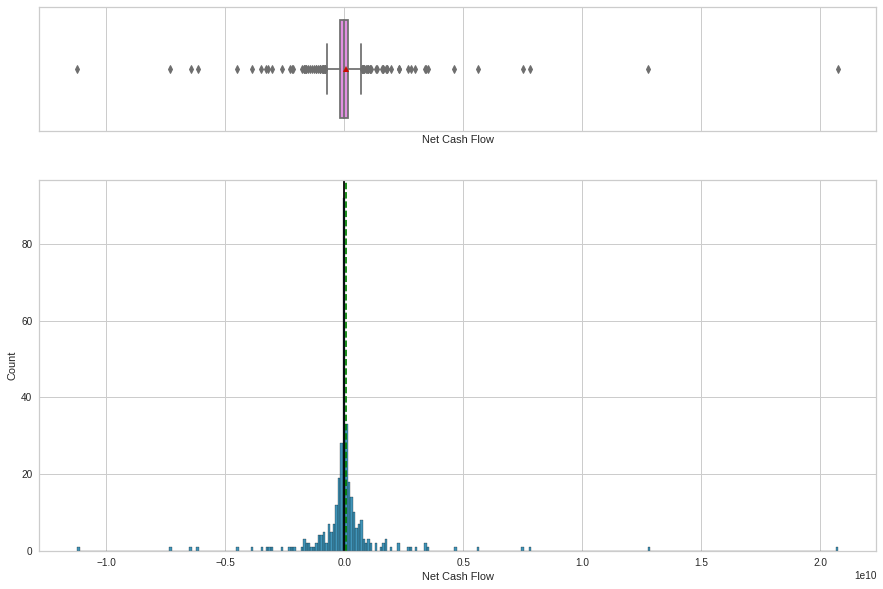

In [18]:
histogram_boxplot(df, "Net Cash Flow")

- Net cash flow appears to be an approximately normal distribution with a number of left and right outliers

#### **Net Income**

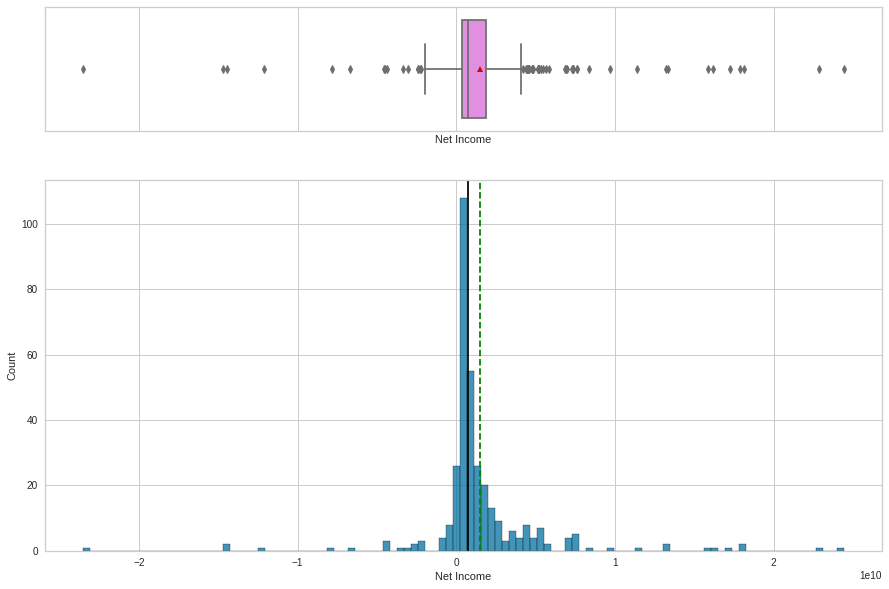

In [19]:
histogram_boxplot(df, "Net Income")

- Net income appears to be an slightly right skewed distribution with a number of left and right outliers but more on the right

#### **Earnings per share (EPS)**

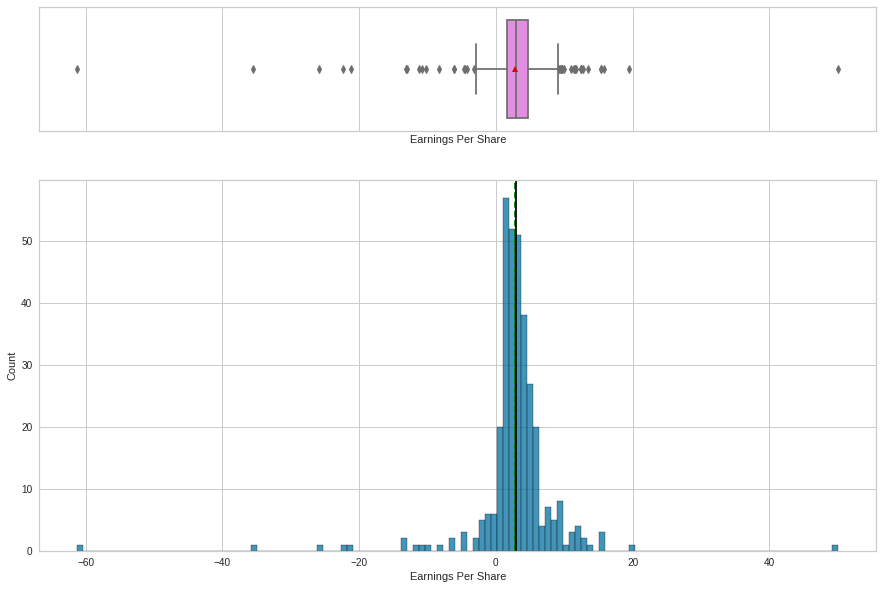

In [20]:
histogram_boxplot(df, "Earnings Per Share")

- EPS appears to be an approximately normal distribution with a number of left and right outliers

#### **Estimated shares outstanding**

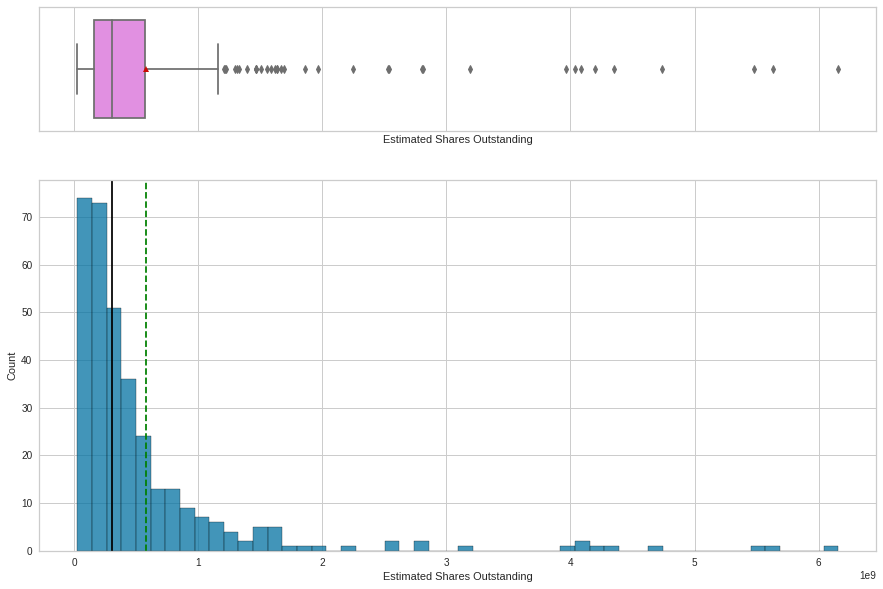

In [21]:
histogram_boxplot(df, "Estimated Shares Outstanding")

- Net shares outstanding appears to be fairly right skewed distribution with a number of right outliers

#### **P/E ratio**

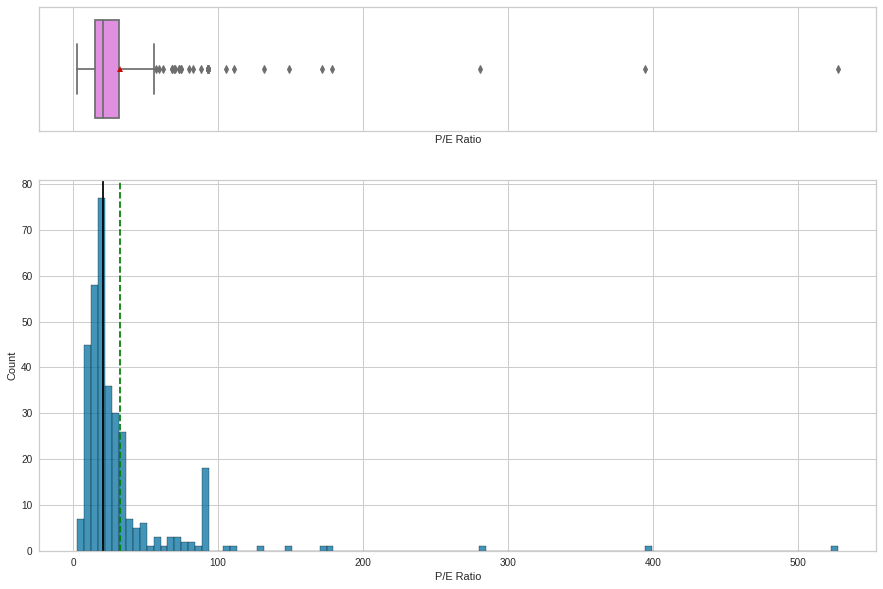

In [22]:
histogram_boxplot(df, "P/E Ratio")

- P/E ratio appears to be slightly right skewed distribution with a number of right outliers

#### **P/B ratio**

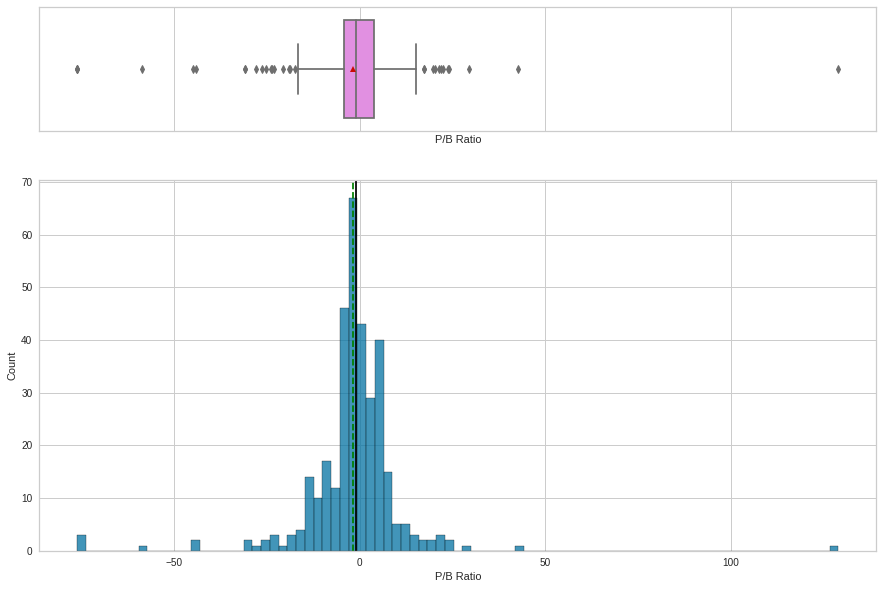

In [23]:
histogram_boxplot(df, "P/B Ratio")

- P/B ratio appears to be approximately normal distribution with a number of left and right outliers

### **Categorical Variables**

#### **GICS Sector**

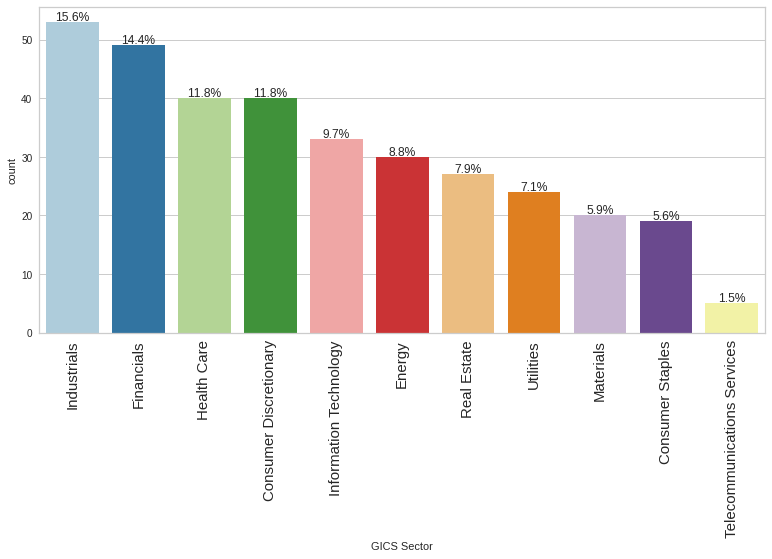

In [24]:
labeled_barplot(df,'GICS Sector',perc=True)

- Industrials dominate in the GICS sector making up ~16% of all securities
- Next top 4 sectors are Financials, Health Care, Consumer Discretionary and IT
- Top 5 sectors make up nearly 65% of all securities


#### **GICS Subindustry**

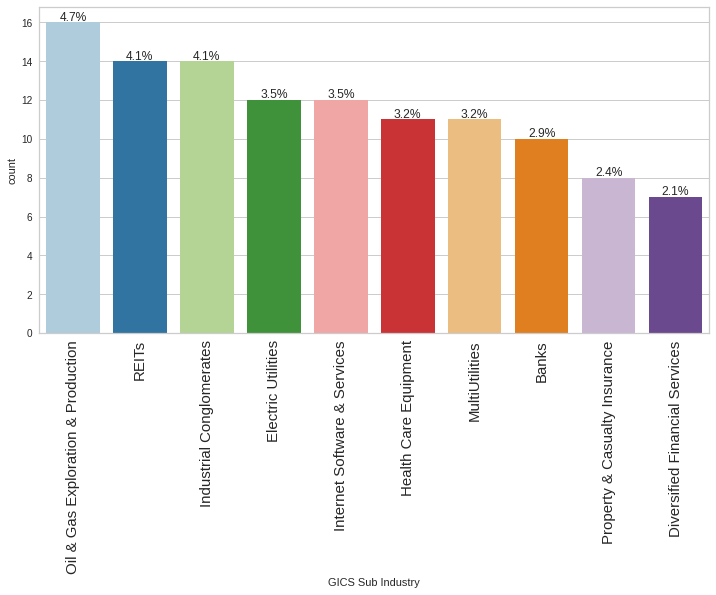

In [25]:
labeled_barplot(df,'GICS Sub Industry',n=10,perc=True)

- Oil and Gas Exploration and Production, REITs and Industrial Conglomerates make up the top 3 GICS sub industry accounting for nearly 13% of all securities

## Bivariate Analyses

#### **Correlations between numeric variables**

In [26]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

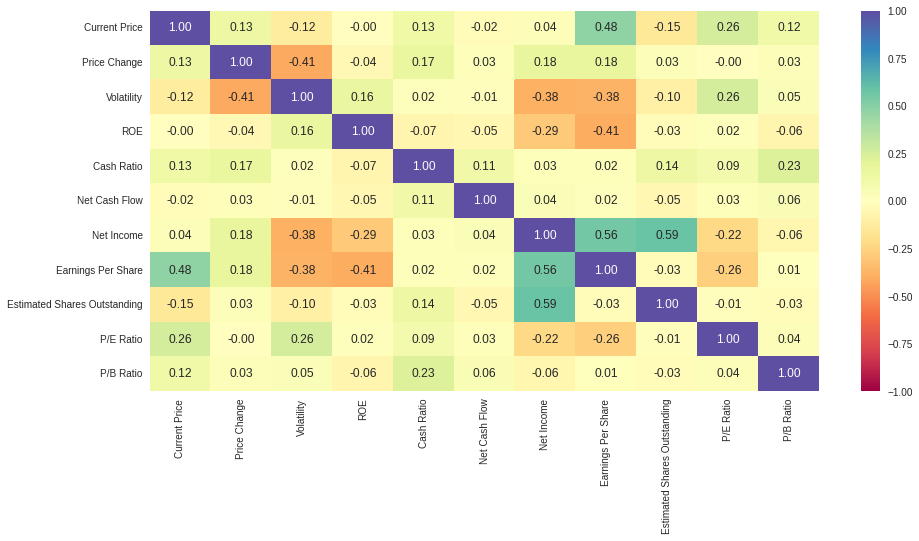

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##### **Q3. How are the different variables correlated with each other?**

*   `Net Income` is positively correlated with `Earnings per share` and `Estimated Shares outstanding`. Higher net incomes leads to higher EPS and greater shareholder interest

*   `Earnings per share` also has positive correlation with `Current Price`. Higher EPS leads to an increase in stock prices

*   `Volatility` is negatively correlated with `Price Change`, `Net Income` and `Earnings per share`. Downward shifts in price change, net income and EPS all likely leads to increased volatility in stock prices

*   `ROE`is negatively correlated with `Earnings per share`

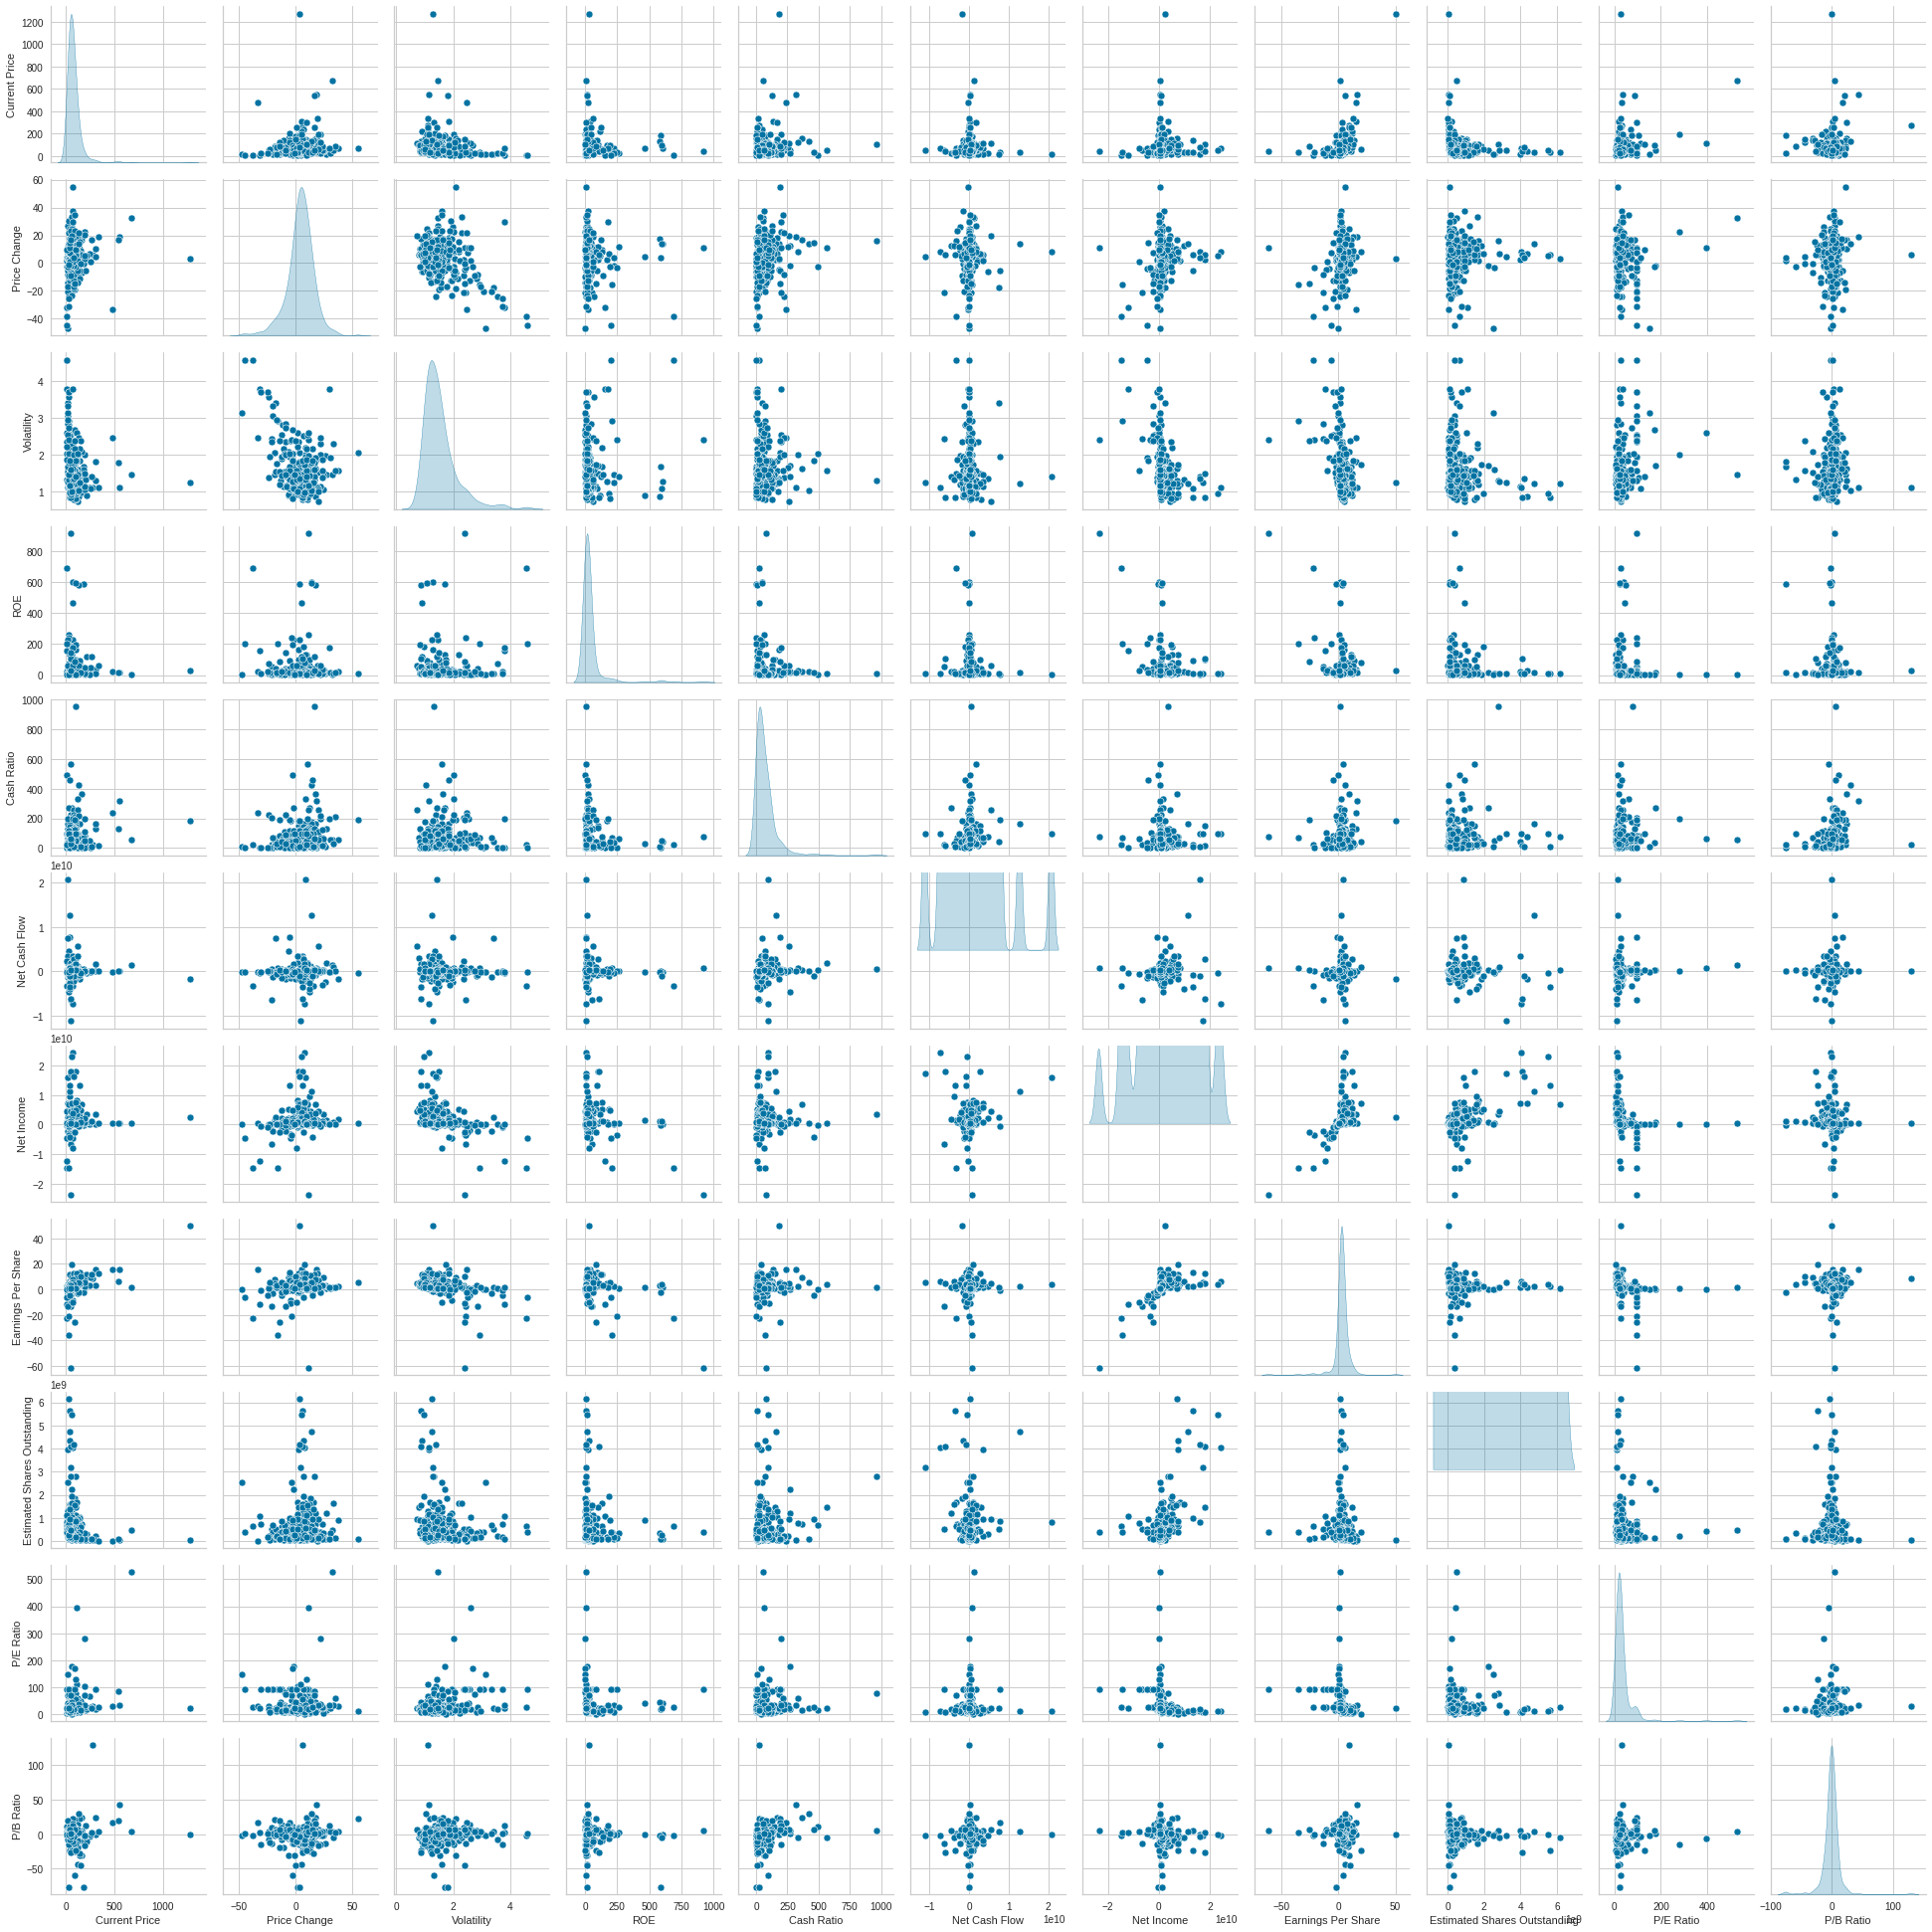

In [28]:
sns.pairplot(data=df[num_cols], palette="bright",diag_kind='kde')
plt.show()

- There are not a lot of very distinct clusters of decent sizes apparent from the pairplots. Most of the securities seem to be part of one cluster and there are a few securities that seem to be separated from it

- This may hint towards that a lot of securities may end up in one single cluster and a smaller no of securities will be present in the remaining cluster(s)

#### **Price Change vs Economic Sector**

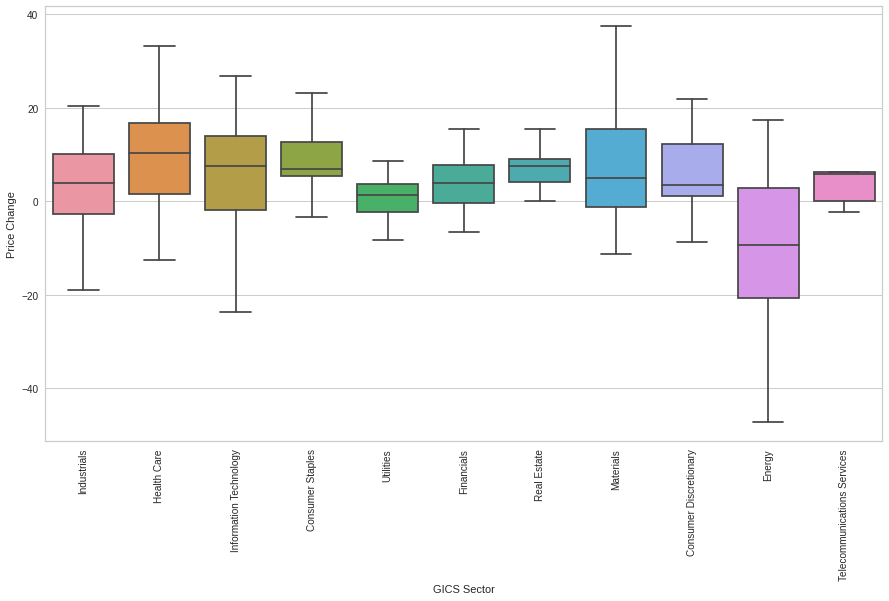

In [29]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='GICS Sector', y='Price Change',showfliers=False)
plt.xticks(rotation=90);

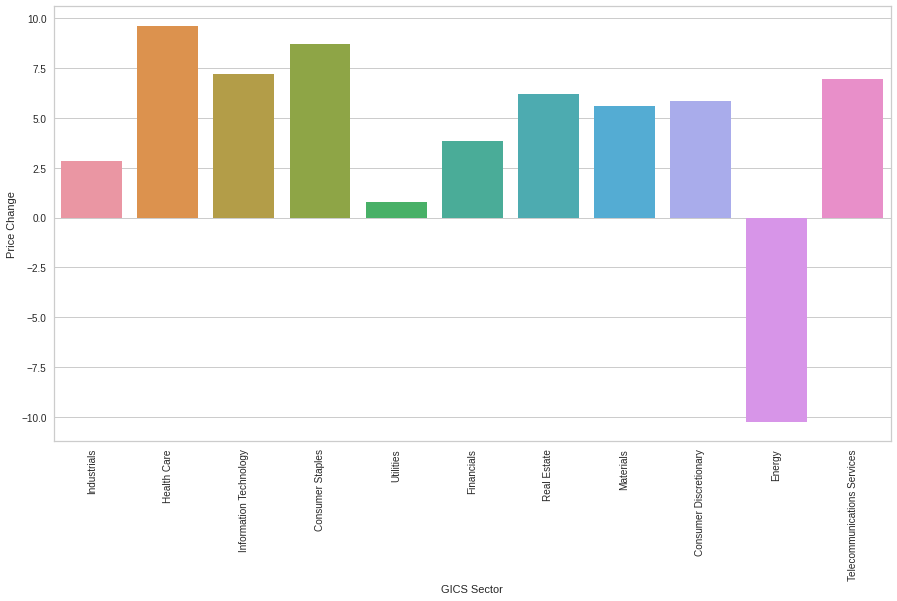

In [30]:
plt.figure(figsize = (15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90);

##### **Q2. The stocks of which economic sector have seen the maximum price increase on average?**

- It appears that the health care sector have seen the maximum price increase on average closely followed in its toes by consumer staples

- On the other hand, Energy sector have seen the maximum price decrease and the only sector which have showed a broad price decline on average

#### **Cash Ratio vs Economic Sector**

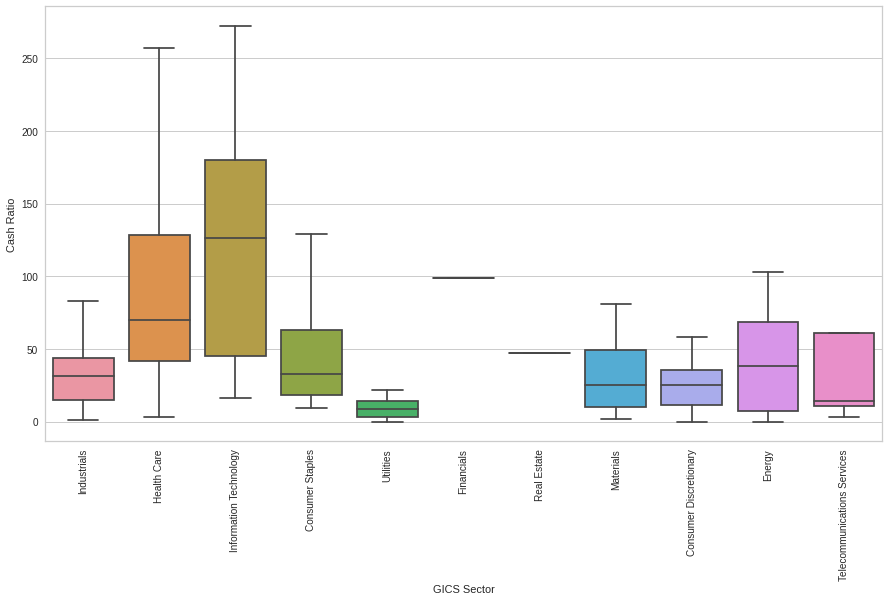

In [31]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='GICS Sector', y='Cash Ratio',showfliers=False)
plt.xticks(rotation=90);

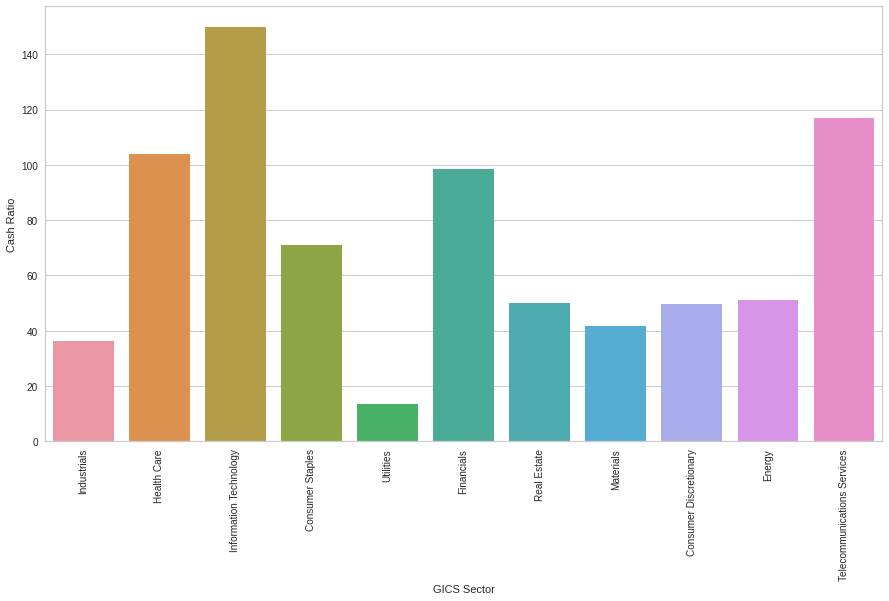

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90);

##### **Q4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

- Information Technology sector on average appears to be the most cash rich amongst all economic sectors

- It is followed by Telecommunication services, Healthcare, Financials and Consumer staples as the next 4 cash rich sectors in decreasing order

- Real Estate, Consumer Discretionary and Energy sectors have similar amounts of cash and cash equivalents closely followed by Materials and Industrial sectors

- Utilities sector appear to be the most cash strapped/cash poor on average amongst all the sectors

#### **P/E Ratio vs Economic Sector**

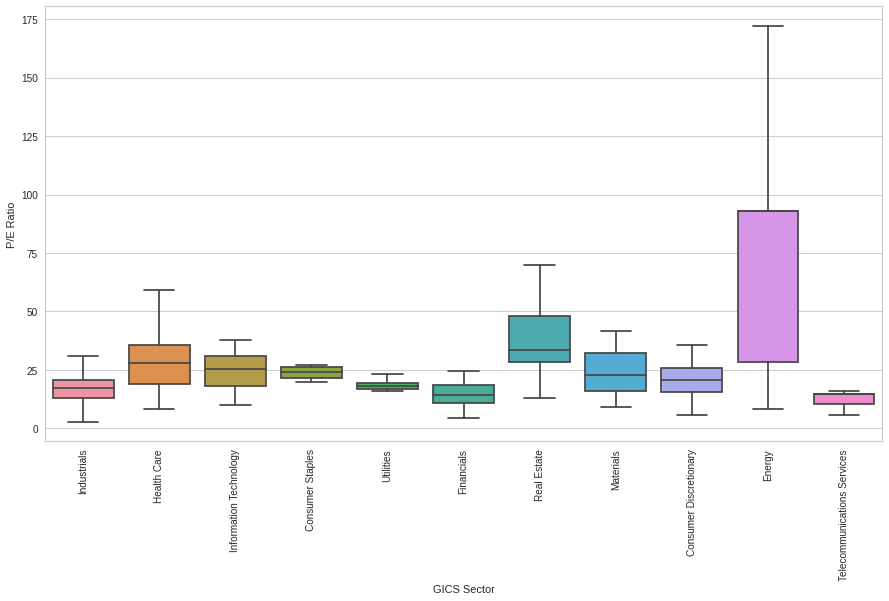

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='GICS Sector', y='P/E Ratio',showfliers=False)
plt.xticks(rotation=90);

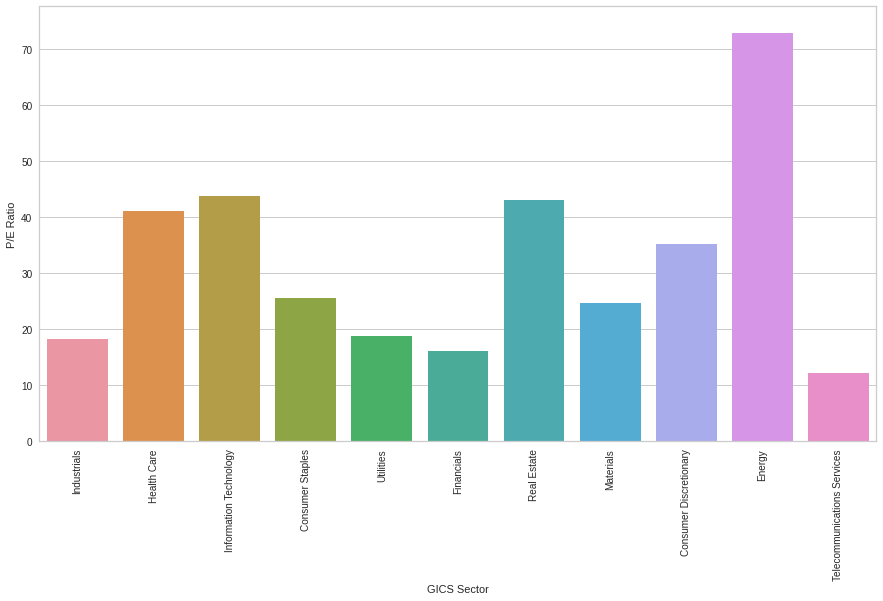

In [34]:
plt.figure(figsize = (15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90);

##### **Q5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

- Energy sector have the highest P/E ratios on average. This suggests that shareholders are willing to pay more money to hold securities in this sector relative to other sectors making it a bit of a overcrowded sector. In a comparative scale with other sectors, Energy sector thus appears to be overvalued 

- Health Care, IT , Real Estate and Consumer Discretionary occupy the 2nd tier of P/E ratios on average amongst other sectors

- Consumer staples and Materials sectors occupy the 3rd tier in terms of P/E ratios

- Industrials and Utility occupy the next tier in terms of P/E ratios

- Financials and Telecommunication services have the lowest P/E ratios amongst all sectors and may be the most undervalued of all the sectors

## Key insights based on EDA

- A no of numeric variables are right skewed and have a lot of outliers particularly volatility, ROE, Cash Ratio, P/E ratio. It will be interesting to observe if such outliers represent key financial attributes that can help separate certain stocks from other groups of stocks and facilitate clustering

- Most of the numeric variables do not have strong correlations (positive or negative) suggesting each attribute may hold key characteristics in clustering different types of stocks 

- There are not a lot of very distinct clusters apparent from the pairplots between numeric variables. This may hint that a lot of securities may end up in one single cluster and a smaller no of securities will be present in the remaining cluster(s)

- Health care sector shows maximum price increase on average while the Energy sector shows maximum price decline amidst the various economic sectors

- Information Technology sector on average appears to be the most cash rich amongst all economic sectors

- Utilities sector appear to be the most cash strapped/cash poor on average amongst all the sectors

- Energy sector have the highest P/E ratios on average. This suggests that shareholders are willing to pay more money to buy Energy stocks and these stocks may be over-valued

- In contrast, Financials and Telecommunication services have the lowest P/E ratios amongst all sectors and may be the most undervalued of all the sectors. These stocks may be good stocks to buy for long-term investors

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

## Outlier Check

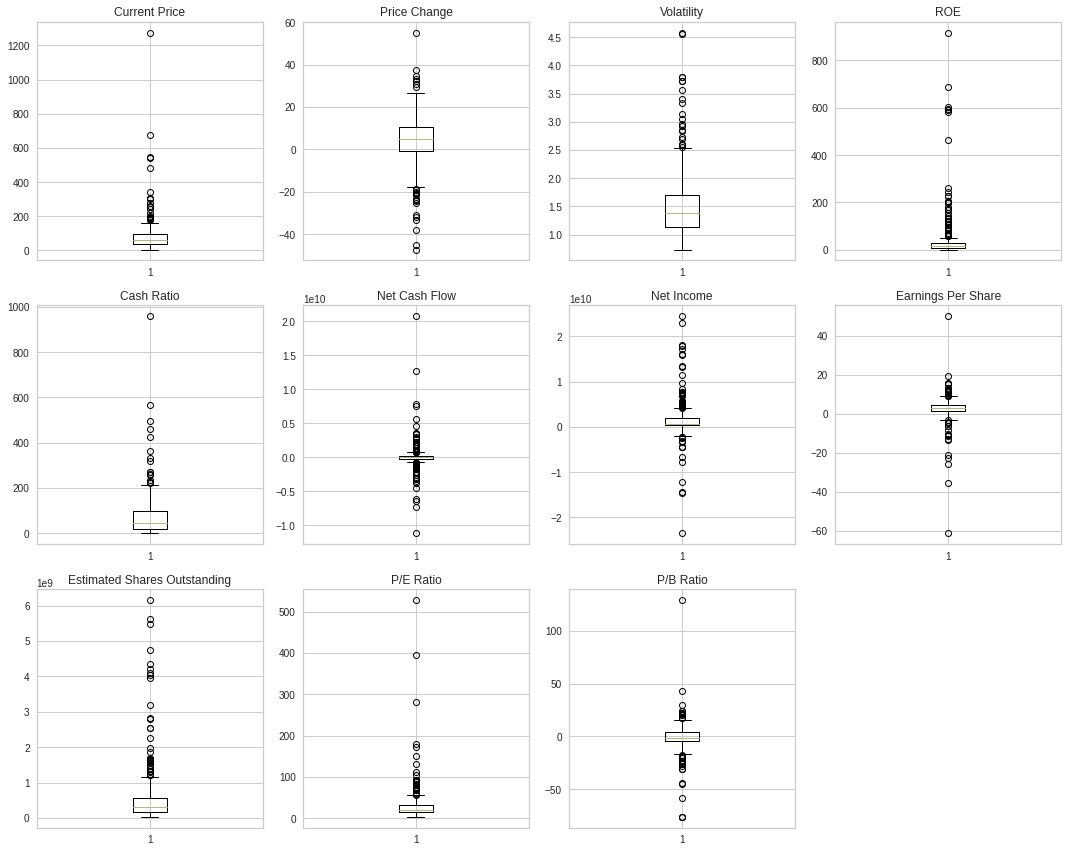

In [35]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Although there are a number of outliers on all of the numeric variables, these will not be treated as they represent actual variability in the dataset 

## Data Scaling

- It is absolutely critical to scale the data before doing clustering 

- Without data scaling, clustering would be disproportionately dominated by the variables: `Net Cash Flow`, `Net Income` and `Estimated shares outstanding`

In [36]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [37]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# K-means Clustering

In [38]:
# Create a dataframe copy of the original and scaled data for use in K-Means Clustering

k_means_df=df.copy()

k_means_scaled_df=subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

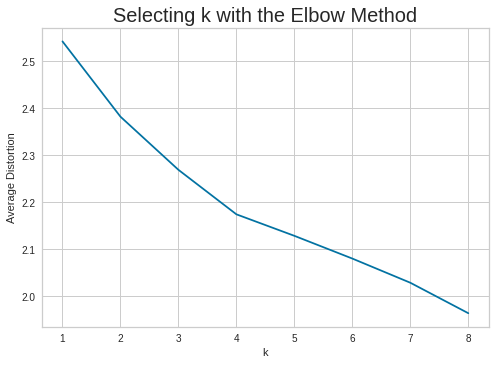

In [39]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k,random_state=1)
    model.fit(k_means_scaled_df)
    prediction = model.predict(k_means_scaled_df)
    distortion = (
        sum(
            np.min(cdist(k_means_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / k_means_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-");
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

It appears that k=4 or k=5 would be the most appropriate based on the elbow method

## Silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.43228336443659804
For n_clusters = 6, silhouette score is 0.4005422737213617
For n_clusters = 7, silhouette score is 0.3976335364987305
For n_clusters = 8, silhouette score is 0.40278401969450467
For n_clusters = 9, silhouette score is 0.3778585981433699


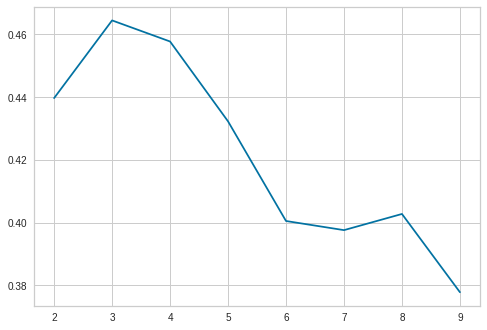

In [40]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict((k_means_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score);

It appears that the highest silhouette scores are for k =3 or k =4

### Finding optimal no of clusters with silhouette coefficients

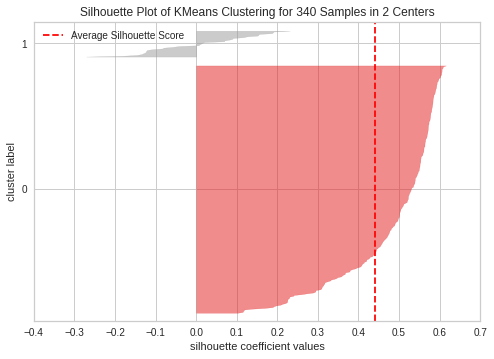

In [41]:
# silhouette coefficients with no of clusters = 2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

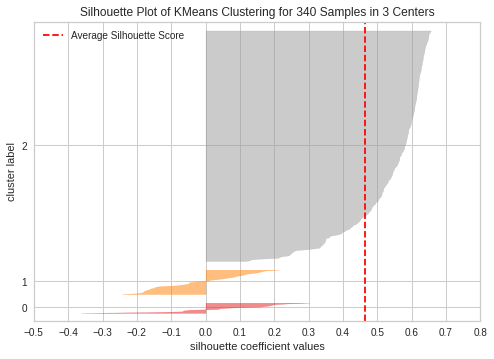

In [42]:
# silhouette coefficients with no of clusters = 3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

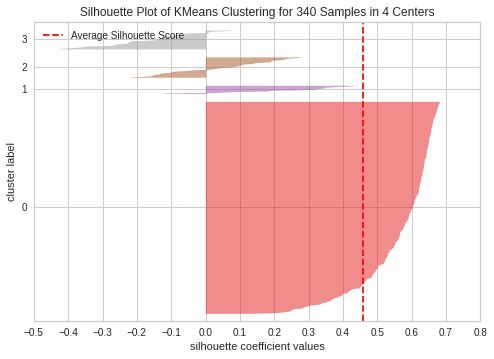

In [43]:
# silhouette coefficients with no of clusters = 4

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

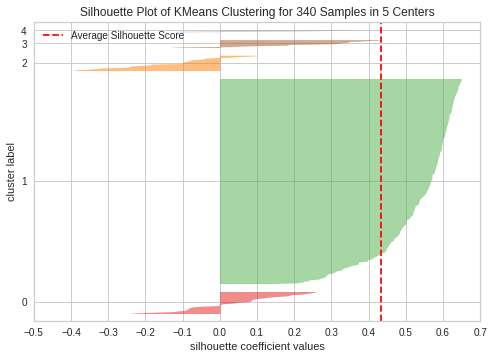

In [44]:
# silhouette coefficients with no of clusters = 5

visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

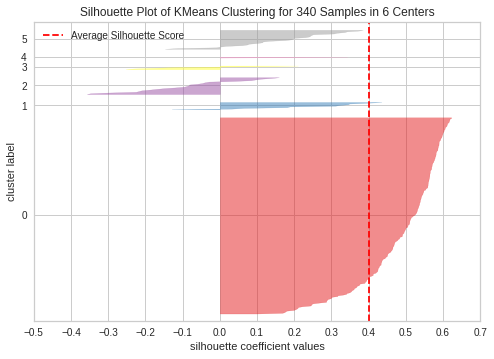

In [45]:
# silhouette coefficients with no of clusters = 6

visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

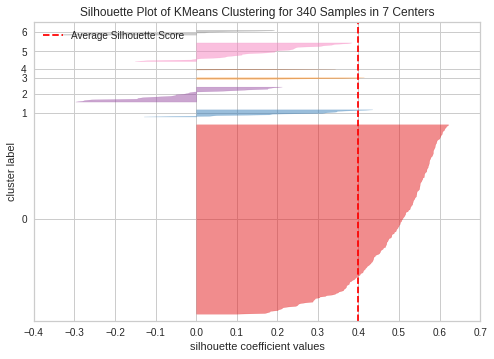

In [46]:
# silhouette coefficients with no of clusters = 7

visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_scaled_df)
visualizer.show();

##### **Observations:**

- Optimal cluster size based on the elbow method alone appears to be k = 4 or 5

- Optimal cluster size based on the silhouette scores alone appears to be k = 3 or 4

- Visual cluster representations with silhouette scores do not provide very clear indications as to the optimal no of clusters though k = 3 , 4 or 5 seems reasonable choices

- Based on the elbow method, silhoutte scores and the visual cluster representations for different k's, it seems that k =4 would be the most appropriate number of clusters consistent with all of the above observations

## Selecting Final Model

- K =4 is chosen as the final no of clusters based on the observations

In [47]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [48]:
# Adding kmeans cluster labels to the original dataframe
k_means_df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [49]:
# Calculating mean values for every variable in each cluster
cluster_profile = k_means_df.groupby("K_means_segments").mean()

In [50]:
# Calculating no of observations in each cluster
cluster_profile["count_in_each_segment"] = (
    k_means_df.groupby("K_means_segments")["Security"].count().values
)

In [51]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


#### Displaying securities in each cluster

In [52]:
# let's see the names of the companies in each cluster
for cl in k_means_df["K_means_segments"].unique():
    print(
        "The",
        k_means_df[k_means_df["K_means_segments"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(k_means_df[k_means_df["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 277 companies in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International

#### Grouping securities by economic sector in each cluster

In [53]:
# Grouping securities by economic sector in each cluster
k_means_df.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  Telecommunications Services     2
2                 

#### Boxplot of numerical variables for each cluster

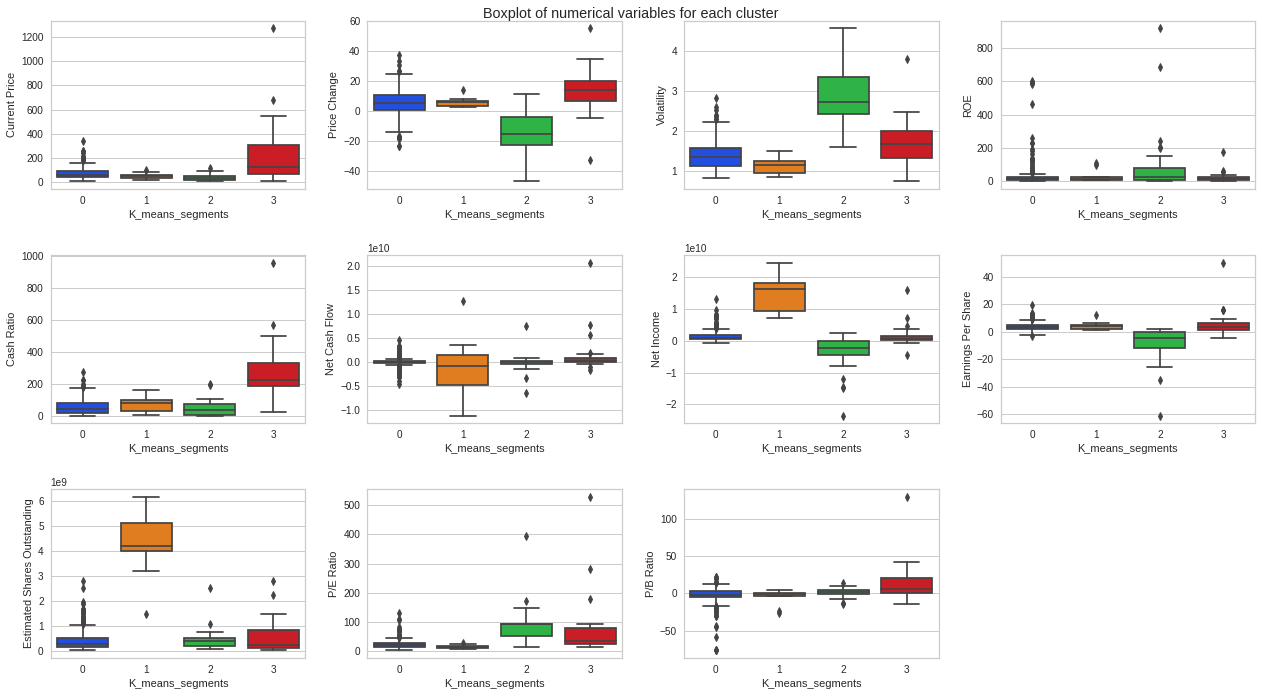

In [54]:
# Boxplot of numerical variables for each cluster 

plt.figure(figsize=(18, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=k_means_df, x="K_means_segments", y=variable, palette='bright')

plt.tight_layout(pad=2.0)

#### Boxplot of numerical variables for each cluster without outliers

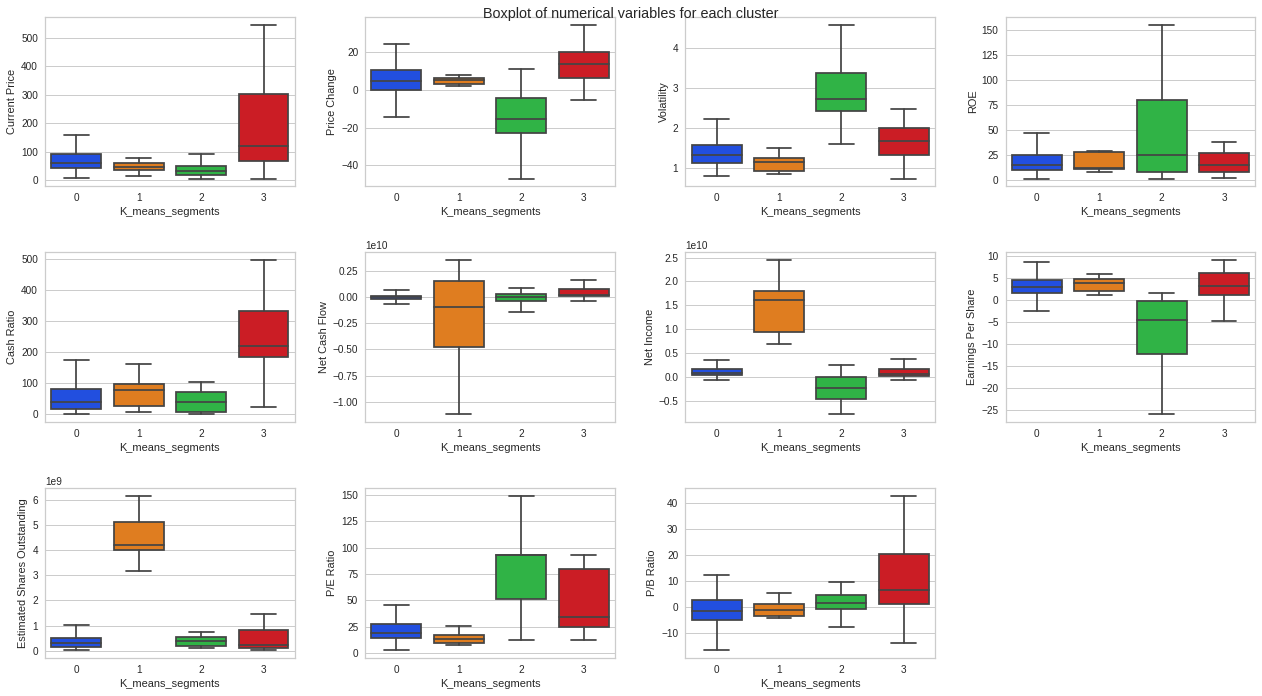

In [55]:
# Boxplot of numerical variables for each cluster without outliers

plt.figure(figsize=(18, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=k_means_df, x="K_means_segments", y=variable, showfliers=False, palette='bright')

plt.tight_layout(pad=2.0)

#### Barplot of numerical variables for each cluster without outliers

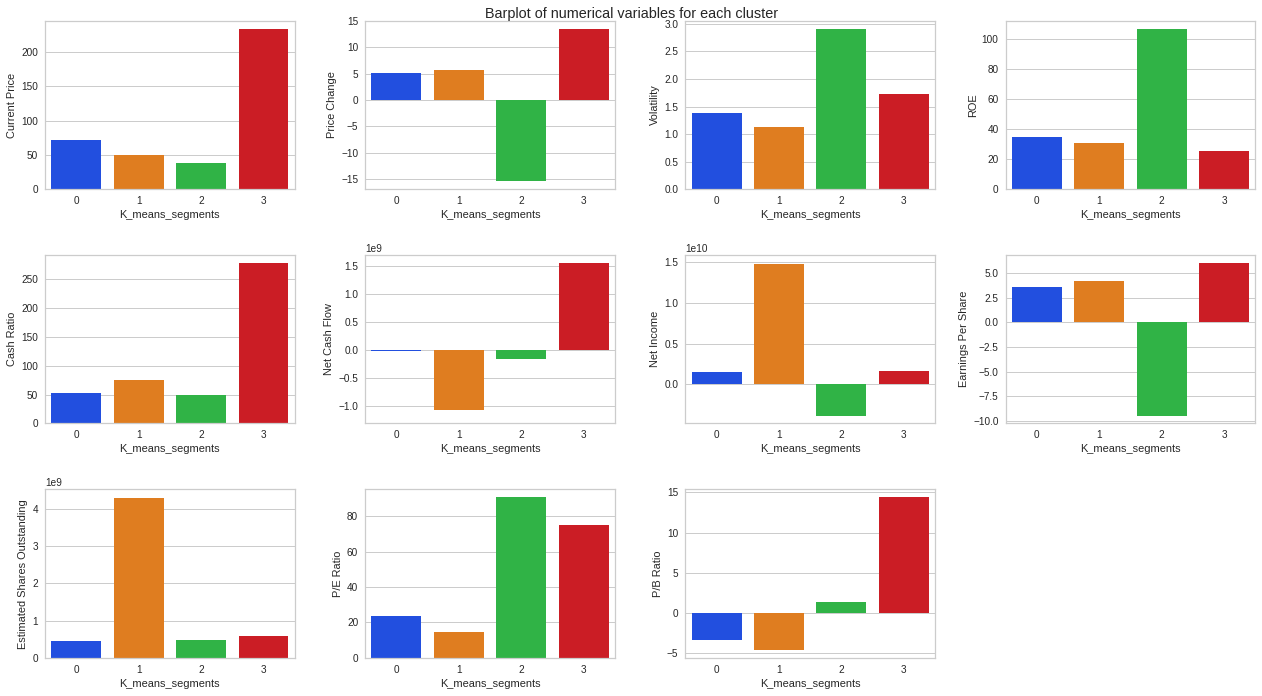

In [56]:
# Barplot of numerical variables for each cluster without outliers

plt.figure(figsize=(18, 10))
plt.suptitle("Barplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(data=k_means_df, x="K_means_segments", y=variable, ci=False, palette='bright')

plt.tight_layout(pad=2.0)

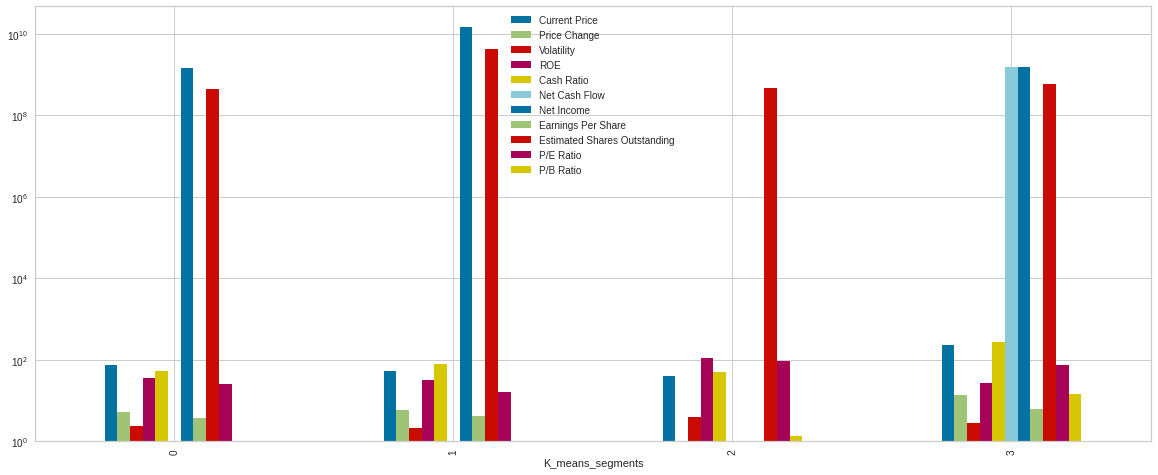

In [57]:
#Bar plot with all attributes in the same plot for all clusters
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 8),log=True);

### **Insights from K-means clustering**

**Cluster 0: Represents a diverisified broad market portfolio like S&P500**
  - Majority of the companies (~80%) occupy this cluster
  - All of the economic sectors are represented in this cluster
  - This cluster thus provides strong diversification as stocks from all sectors are represented and outsized risks in specific sectors will be balanced by reward in another economic sector
  - Companies in this cluster have a fairly low P/E ratios on average as well as low to negative P/B ratios (negative P/B values dominated by outliers).This sector thus broadly represents undervalued stocks
  - Stocks in this cluster have low volatility and moderate ROE and good for risk free passive investors
  - Stocks represent moderate positive change in price
  - Stocks in this cluster do not have a lot of cash in hand (low cash ratio) , have low EPS, balanced cash flow (inflow ~ outflows) and slight positive net income

**Cluster 1: Largest market capitalization, highly reputed large companies similar to Dow Jones Industrials**
  - Represents 11 stocks mostly from Financials, Healthcare, Telecom services along with representation from Energy, Consumer staples & discretionary and IT
  - Companies in this sector have the largest market capitalization ( Current Price * Estimated Shares Outstanding [ESO]) as they have largest no of shares outstanding amongst all sectors
  - Companies have lowest volatility and moderate ROE and thus can be considered as safer investsments outside investing in broad market funds like represented by cluster 0
  - Companies have a very large net income, decent cash ratio although net cash flow is negative suggesting large cash outflows
  - Companies have the lowest P/E ratios and 2nd best EPS amongst the clusters and thus can be considered most undervalued and great investments for long term steady return seeking passive investors

**Cluster 2: Energy dominated High Growth, high volatility Stocks**
  - Represents 27 companies of which 80% of the companies are Oil and Gas related Energy stocks
  - These stocks have the highest ROE but also the highest volatility amongst the clusters and thus may be well suited for risk taking, growth minded investors looking for outsized market returns while willing to take high risks in their investment strategy
  - These companies have an intermediate cash ratio amongst the other clusters but have slightly negative cash flow, are not profitable (negative net income) and have the lowest EPS (negative EPS) at the moment
  - These companies have the highest P/E ratio amongst the other clusters indicating that they are over-valued and investors are willing to buy at high prices seeking market outperforming returns despite the negative EPS and negative income
  
**Cluster 3: High Cash Rich, Profitable companies**
  - Represents 25 companies dominated by the Health Care, Consumer Discretionary and IT sectors
  - These stocks represent some of the most cash rich (highest cash ratio) and largest positive cash inflow companies amongst all the clusters
  - These stocks also have the highest EPS and are profitable with positive net income
  - Despite this, these stocks have moderate volatility (2nd highest) and lowest ROE amongst all the sectors
  - These stocks also have high P/E ratios suggesting they may be a bit over-valued and the highest P/B ratio amongst the clusters

# Hierarchical Clustering

In [58]:
# Create a dataframe copy of the original and scaled data for use in Hierarchial Clustering

hier_df=df.copy()

hier_scaled_df=subset_scaled_df.copy()

### Checking Cophenetic Correlation

In [59]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hier_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hier_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

### Highest cophenetic correlation 

In [60]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


### Exploring cophenetic correlation with Euclidean Distance and different linkage methods

In [61]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hier_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hier_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


### Highest cophenetic correlation 

In [62]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Checking Dendrograms

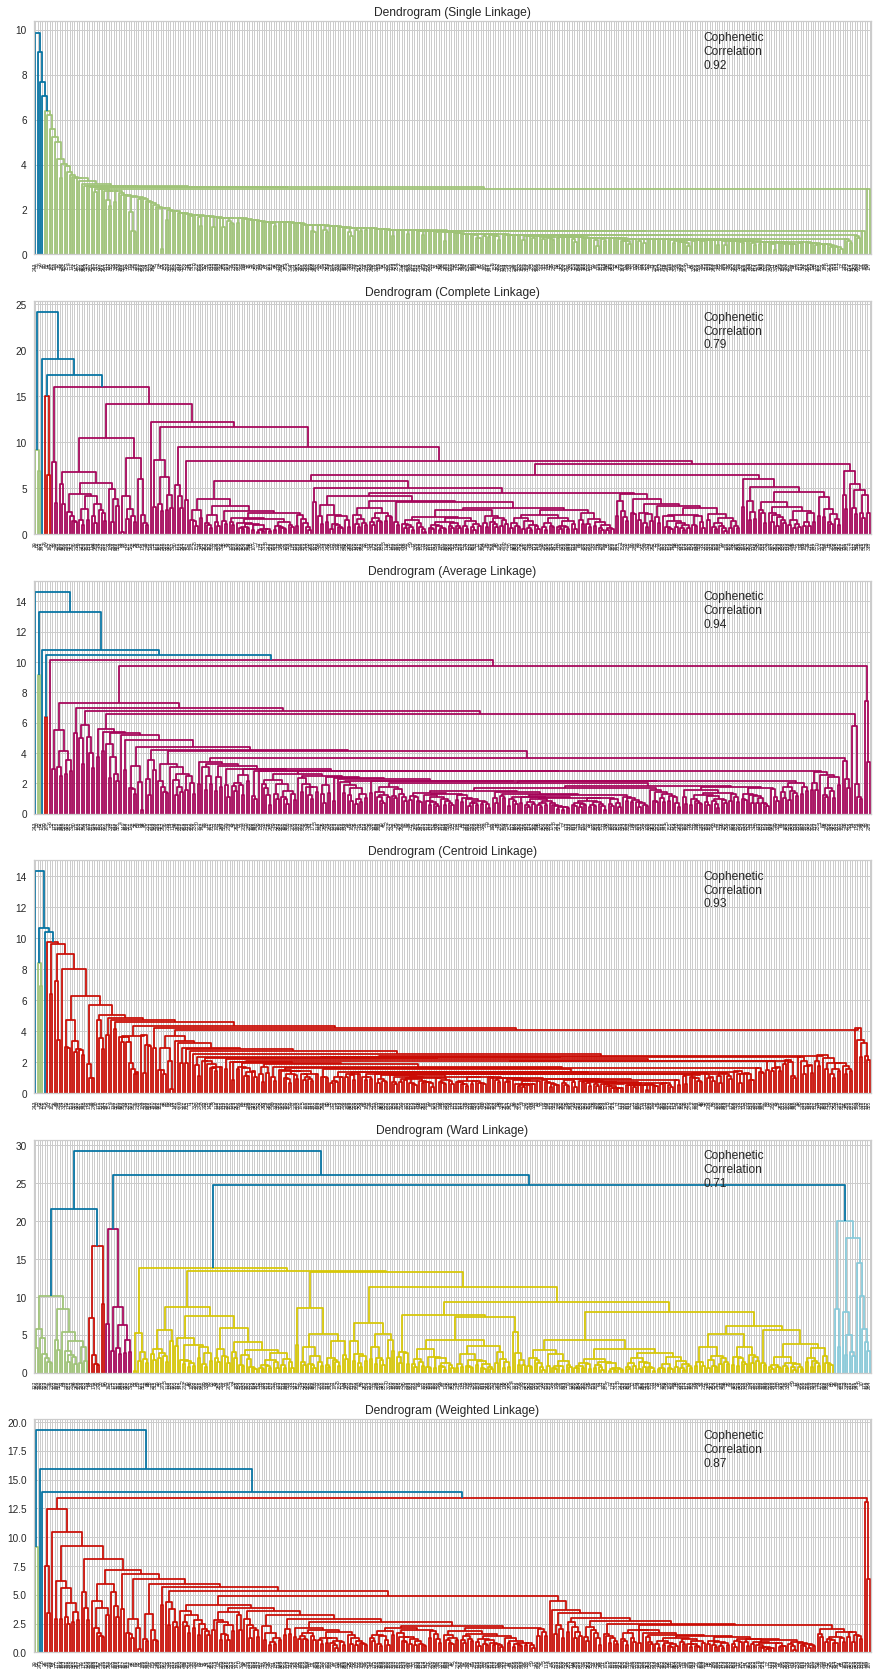

In [63]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
comparison =[]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hier_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    comparison.append([method, coph_corr])

### Comparison of cophenetic correlations for different linkage methods

In [64]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
cophcorr = pd.DataFrame(comparison, columns=compare_cols)
cophcorr = cophcorr.sort_values(by="Cophenetic Coefficient")
cophcorr

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


##### **Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 7 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn with highest cophenetic coefficient

In [65]:
# Create a dataframe copy of the original and scaled data

model_highest_df=hier_df.copy()
model_highest_scaled_df= hier_scaled_df.copy()

In [66]:
HCmodel_highest = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel_highest.fit(hier_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [67]:
model_highest_scaled_df["HC_Clusters"] = HCmodel_highest.labels_
model_highest_df["HC_Clusters"] = HCmodel_highest.labels_

### Cluster Profiling

In [68]:
hier_cluster_profile1 = model_highest_df.groupby("HC_Clusters").mean()

In [69]:
hier_cluster_profile1["count_in_each_segments"] = (
    model_highest_df.groupby("HC_Clusters")["Security"].count().values
)

#### Displaying securities in each cluster



In [70]:
# let's see the names of the companies in each cluster
for cl1 in model_highest_df["HC_Clusters"].unique():
    print(
        "The",
        model_highest_df[model_highest_df["HC_Clusters"] == cl1]["Security"].nunique(),
        "companies in cluster",
        cl1,
        "are:",
    )
    print(model_highest_df[model_highest_df["HC_Clusters"] == cl1]["Security"].unique())
    print("-" * 100, "\n")

The 330 companies in cluster 6 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarn

#### **Observations**

- 3 of the 7 clusters have just **1** security in them

- 3 of the remaining 4 clusters have just **2 or 3** securities in them

- All the other securites are grouped in a single cluster **Cluster 6**

- Clearly this clustering does not provide much value as most of the clusters do not have enough variability

- Looking at the remaining linkage methods, **Ward linkage** appears to be the most appealing because it has the most distinct and separated clusters as seen in its dendogram.

- **5 clusters** appears to be the appropriate number of clusters from the dendrogram for Ward linkage

### Creating Final Model using sklearn

- We will be using n-clusters = 5 with euclidean distance and ward linkage as the final model

In [71]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(hier_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [72]:
hier_scaled_df["HC_Clusters"] = HCmodel.labels_
hier_df["HC_Clusters"] = HCmodel.labels_

### Final Cluster Profiling

In [73]:
# Calculating mean of each variable in each cluster
hier_cluster_profile = hier_df.groupby("HC_Clusters").mean()

In [74]:
# Calculating total no of companies in each cluster
hier_cluster_profile["count_in_each_segments"] = (
    hier_df.groupby("HC_Clusters")["Security"].count().values
)

#### Displaying securities in each cluster

In [75]:
# let's see the names of the companies in each cluster
for cl in hier_df["HC_Clusters"].unique():
    print(
        "The",
        hier_df[hier_df["HC_Clusters"] == cl]["Security"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(hier_df[hier_df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 285 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Gro

In [76]:
# lets display cluster profile
hier_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


#### Grouping securities by economic sector in each cluster

In [77]:
# Grouping securities by economic sector in each cluster
hier_df.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

#### Boxplot of numerical variables for each cluster

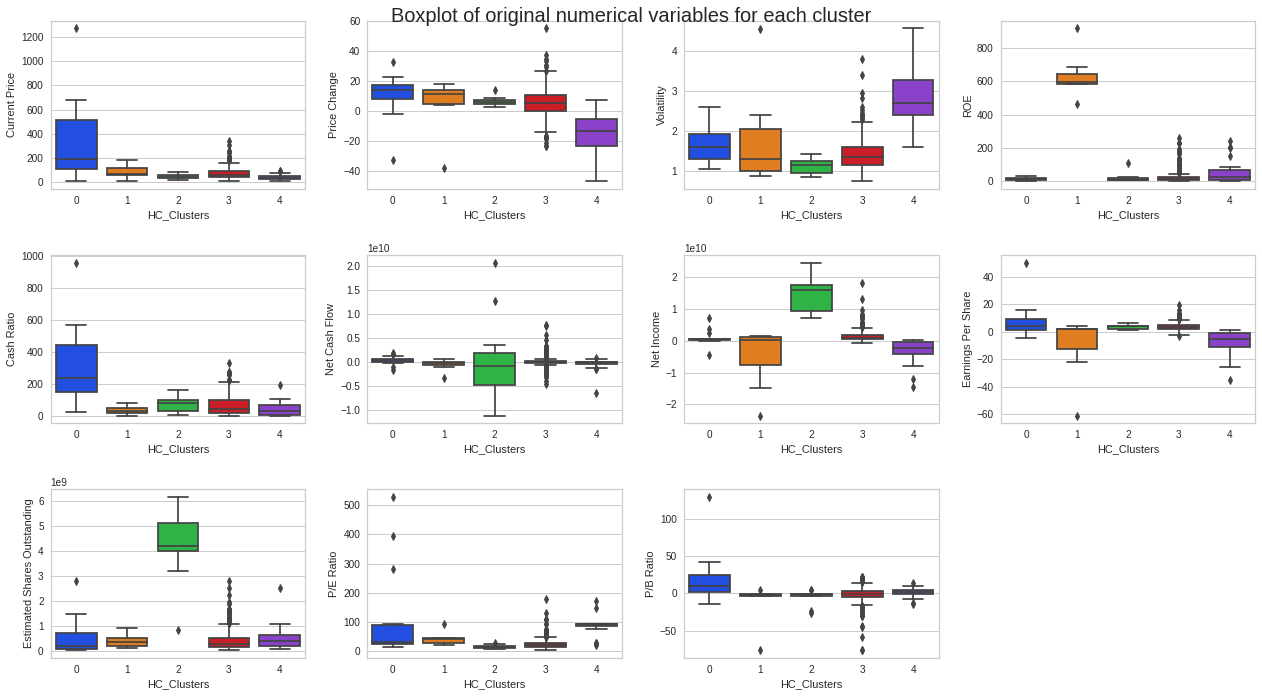

In [78]:
# Boxplot of numerical variables for each cluster
plt.figure(figsize=(18, 10))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hier_df, x="HC_Clusters", y=variable, palette='bright')

plt.tight_layout(pad=2.0)

#### Boxplot of numerical variables for each cluster without outliers

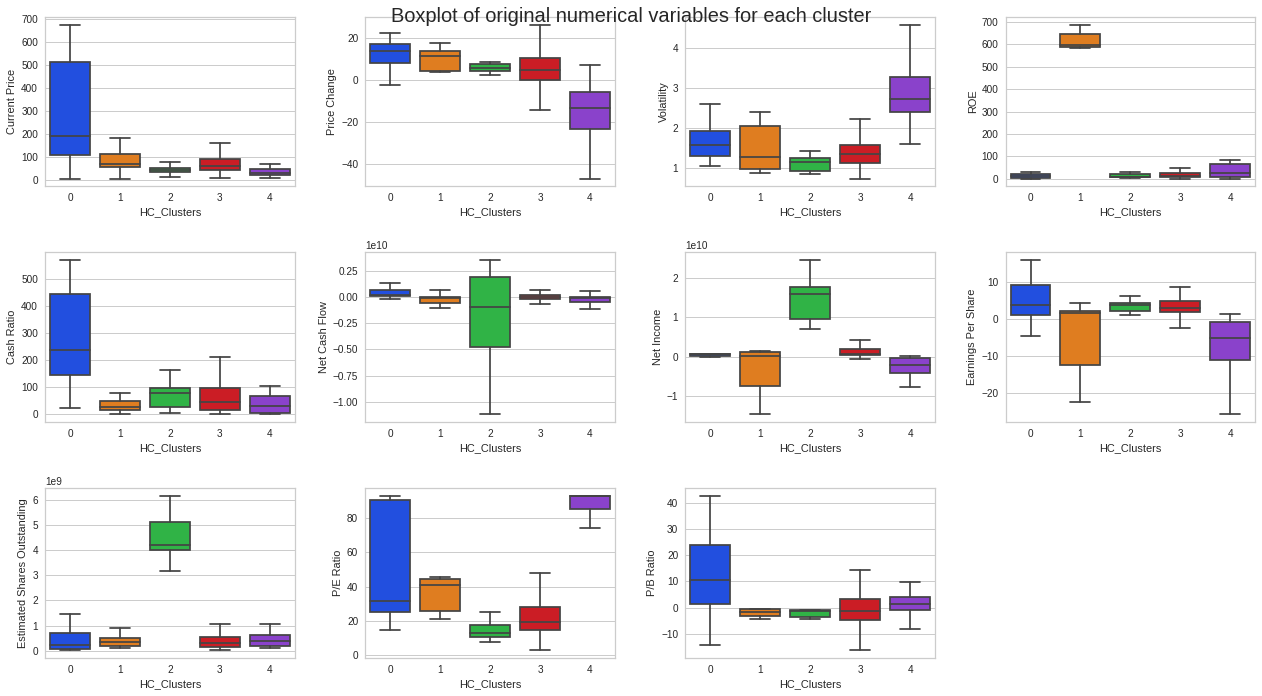

In [79]:
# Boxplot of numerical variables for each cluster without outliers
plt.figure(figsize=(18, 10))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hier_df, x="HC_Clusters", y=variable,showfliers=False,palette='bright')

plt.tight_layout(pad=2.0)

#### Barplot of numerical variables for each cluster without outliers

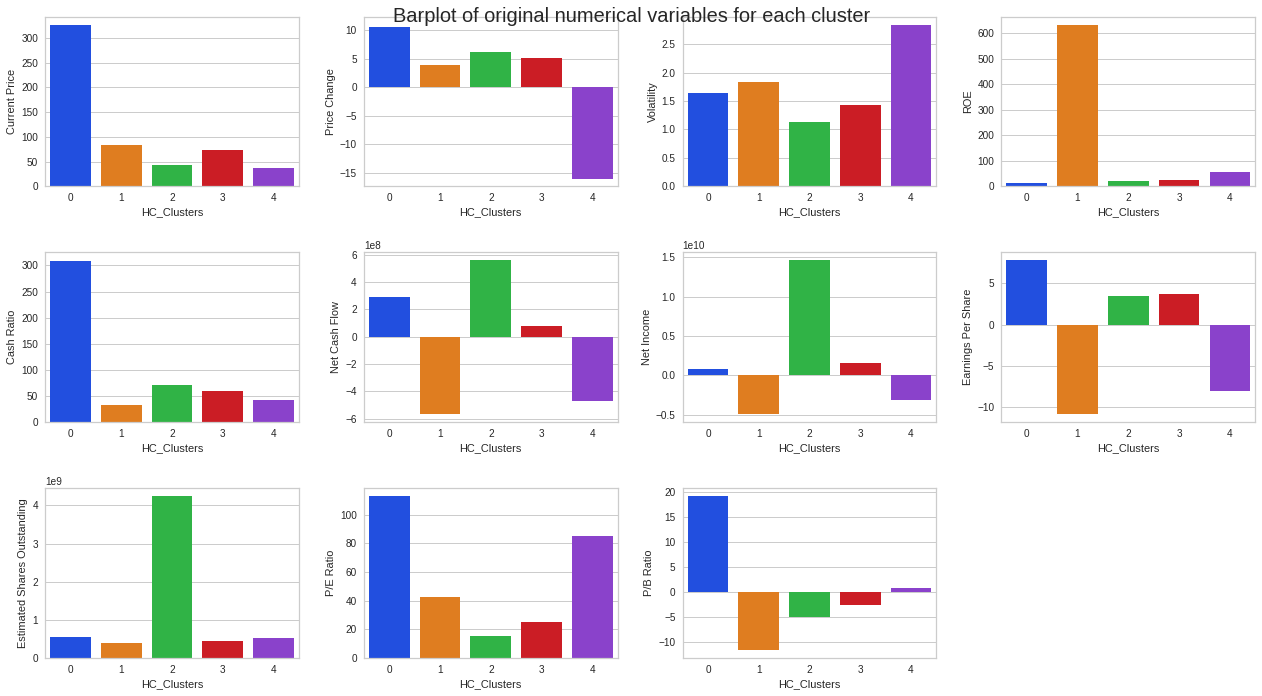

In [80]:
# Barplot of numerical variables for each cluster without outliers
plt.figure(figsize=(18, 10))
plt.suptitle("Barplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(data=hier_df, x="HC_Clusters", y=variable,ci=False,palette='bright')

plt.tight_layout(pad=2.0)

### **Insights from Hierarchial clustering**

**Cluster 0: High Cash Rich, Profitable companies**
  - Represents 15 companies dominated by the Health Care, Consumer Discretionary and IT sectors
  - These stocks represent the most cash rich (highest cash ratio) and 2nd most positive cash inflow companies amongst all the clusters
  - These stocks also have the highest EPS and are profitable with positive net income
  - Despite this, these stocks have moderate volatility and lowest ROE amongst all the sectors
  - These stocks have the highest P/E ratios suggesting they may be significantly over-valued and the highest P/B ratio amongst the clusters

**Cluster 1: High Return of Investment , cash-poor, unprofitable companies**
  - Represents 7 stocks comprised of companies mostly in the consumer staples and Energy sectors
  - These stocks provide an exceptionally high ROE, far higher than any other clusters with a moderately high volatility (2nd highest amongst clusters)
  - These companies however have the lowest cash ratio, highest cash outflow and are the least profitable companies with highest negative net income, and the lowest negative EPS
  - These stocks sell at a moderate P/E ratio but also have the lowest, negative P/B ratio amongst the other clusters

**Cluster 2: Largest market capitalization, highly reputed large companies similar to Dow Jones Industrials**
  - Represents 11 stocks mostly from Financials and Telecom services along with representation from Energy, Health Care, Consumer staples & discretionary and IT
  - Companies in this sector have the largest market capitalization ( Current Price * Estimated Shares Outstanding [ESO]) as they have largest no of shares outstanding amongst all sectors
  - Companies have lowest volatility and low-moderate ROE and thus can be considered as safer investsments outside investing in broad market funds like represented by cluster 3
  - Companies have the largest large net income and largest cash inflow with a decent cash ratio 
  - Companies have the lowest P/E ratios and moderate EPS amongst the clusters and thus can be considered most undervalued and great investments for long-term, steady return seeking passive investors
  
**Cluster 3: Represents a diverisified broad market portfolio like S&P500**
  - Majority of the companies (~84%) occupy this cluster
  - All of the economic sectors are represented in this cluster
  - This cluster thus provides strong diversification as stocks from all sectors are represented and outsized risks in specific sectors will be balanced by reward in another economic sector
  - Companies in this cluster have a fairly low P/E ratios on average as well as low to negative P/B ratios (negative P/B values dominated by outliers).This sector thus broadly represents undervalued stocks
  - Stocks in this cluster have low volatility and moderate ROE and good for risk free passive investors
  - Stocks represent moderate positive change in price
  - Stocks in this cluster have moderate cash ratio, positive cash flow and  positive net income indicating slight profitability
  - Stocks also have the 2nd best EPS amongst all clusters

**Cluster 4: Energy dominated High Growth, high volatility Stocks**
  - Represents 22 companies of which 91% of the companies are Oil and Gas related Energy stocks
  - These stocks have higher ROE compared to most clusters but also the highest volatility amongst the clusters. These stocks may be well suited for risk taking, growth minded investors looking for outsized market returns while willing to take high risks in their investment strategy
  - These companies have an intermediate cash ratio amongst the other clusters but have slightly negative cash flow, are not profitable (negative net income) and have low negative EPS 
  - These companies have the 2nd highest P/E ratio amongst the other clusters indicating that they are over-valued and investors are willing to buy at high prices seeking market outperforming returns despite the negative EPS and negative income

## K-means vs Hierarchical Clustering

#### **Q1. Which clustering technique took less time for execution?**

In [81]:
%time

kmeans_time = KMeans(n_clusters=4, random_state=1)
kmeans_time.fit(k_means_scaled_df)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


KMeans(n_clusters=4, random_state=1)

In [82]:
%time
HCmodel_time = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel_time.fit(hier_scaled_df)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


AgglomerativeClustering(n_clusters=5)

- In this scenario, K-means clustering took a total of 3 micro seconds with a wall time of 8 micro seconds

- In contrast, Aggolomerative clustering took slightly more time with a total of 5 micro seconds and a wall time of 9.5 micro seconds

- Broadly there is no difference in time for execution in this scenario with a relatively small sized dataset (340 rows and 11 numeric columns)

- However with a lot more data in a much larger dataset, Agglomerative clustering may end up taking much longer to execute compared to K-means.

#### **Q2. Which clustering technique gave you more distinct clusters, or are they the same?**


- K-means clustering provided 277, 11, 27 and 25 securities in its 4 clusters

- Hierarchial clustering provided 15, 7, 11, 285 and 22 securities in its 5 clusters

- Broadly it seems both clustering techniques provided fairly similar degrees of distinct clusters 

- There are small differences in the types of securites selected by the 2 clustering algorithms despite the broad similarities

#### **Q3. How many observations are there in the similar clusters of both algorithms?**

- K-means clustering provided 277, 11, 27 and 25 securities in its clusters 0, 1, 2 and 3 respectively

- Hierarchial clustering provided 15, 7, 11, 285 and 22 securities in its clusters 0, 1, 2, 3 and 4 respectively

- Of these clusters, Cluster 0 of K-means with 277 companies is very similar to Cluster 3 of Hierarchial clustering with 285 companies. This cluster represents the majority of companies from all economic sectors and is very similar to a diversified S&P500 type cluster of companies

- Cluster 1 of K-means with 11 observations is similar to Cluster 2 of Hierarchial also with 11 observations. This cluster represents large market capitalization companies like a Dow Jones Industrial Average

- Cluster 2 of K-means with 27 observations is similar to cluster 4 of Hierarchial with 22 observations. This cluster mostly represents Energy companies with high growth and high volatility

- Cluster 3 of K-means with 25 observations is similar to cluster 0 of Hierarchial with 15 observations. This represents highly cash rich profitable companies

- Although there are broad similarities in the type of companies represented by these clusters from both algorithms as shown above, there are subtle and distinct differences even in the similar clusters from the different algorithms 



#### **Q4. How many clusters are obtained as the appropriate number of clusters from both algorithms?**

#### **K-means clustering:**
- Using K-means clustering, 4 or 5 clusters seemed appropriate using the elbow method

- Based on silhouette scores, 3 or 4 clusters seemed appropriate

- Visual cluster representations with silhouette scores did not provide very clear indications as to the optimal no of clusters though k = 3 , 4 or 5 seems reasonable choices

- Based on the these metrics combined, **no of clusters = 4 was chosen for the K-means algorithm**

#### **Hierarchial Clustering:**

- Based on highest cophenetic correlation, Hierarchial clustering using euclidean distance and average linkage was initially chosen

- No of clusters were chosen to be 7 based on the dendogram

- However, the cluster obtained had almost 97% of the securities in one single cluster and only a few securities in each of the remaining clusters, thus providing very poor value and insights

- Ward linkage was chosen in the final model with euclidean distance

- **No of clusters chosen to be appropriate was 5 as indicated from the dendogram**

## Conclusions

- We employed two different types of clustering algorithms - **K-Means Clustering** and **Hierarchial clustering** to identify similar types of stocks into distinct clusters based on certain financial data and attributes

- 4 distinct types of clusters were identified using K-means clustering and 5 distinct types of clusters were identified using Hierarchial clustering 

- There are broad similarities in the types of cluster obtained using the different algorithms although there are subtle differences 

## Actionable Insights and Recommendations


- Trade and ahead can create various personalized portfolios for their clients using the insights drawn from the clustering techniques utilized above

- It is of foremost importance to identify the short-term and long-term financial goals, investment time horizons, risk appetite and investment behavior for prospective and current clients before recommending a personalized portfolio of stocks to them

- For the vast majority of investors, a portfolio comprising solely of the cluster of stocks representing the S&P500 type diversified broad market   **[Cluster 0: K-means; Cluster 3: Hierarchial]** is recommended. Alternatively, a mix of diversified broad market cluster and the large market capitalization cluster [**Cluster 1 of K-means**] could be recommended. This portfolio provides the best passive investing strategy with moderate ROE and low volatility and provides the most safe and conservative investing strategy with risk free return for most investors 

- For longer-term investors seeking higher returns than the group above, a mixture of clusters with low P/E ratios could be recommended as these are significantly undervalued stocks.

- Investors seeking extremely safe but low- moderate returns- i.e investors with zero risk tolerance may be recommeded to invest with very cash rich and profitable companies [**Cluster 0 in Hierarchial clustering**]

- Investors with a higher risk tolerance and seeking either more aggresive growth or looking to trade more frequently could be recommeded the clusters with high volatility (e.g. **Cluster 4 in Hierarchial clustering)**. This is particularly suited for investors seeking outsized returns but someone who diligently pays attention to daily market movements. Such investors should be made aware that while vastly outperforming the market may be possible, there is siginifcant risk of losing a lot of money as well. Investors would have to be extremely careful of when to put money in the market and when to pull it out.

- Highly skilled investors can also be recommended to short certain cluster of stocks in certain market environments such as recessions or a interest rate increasing environment etc
  - (1) Overvalued stocks with high P/E ratios 
  - (2) Volatility based stocks 

- Trade&Ahead can also use the above insights to recommend investors to stay away from certain stocks or certain types of stocks according to their risk tolerance and broader financical goals thus protecting investors from potential losses in the stock market

- Trade&Ahead can also help identify more niche stocks or clusters of stocks based on certain attributes depending on investor's needs and goals using a combination of either a greater no of clusters or different linkage or affinity mechanisms 

- Larger dataset representing more securities can also help identify more well designed and suitable cluster of stocks for specific investment needs

